### Mini Programming Assignment 10: Implement a K-Nearest Neighbors Algorithm
##### *Notebook created by Jacob Kreider*

In the following notebook, I will create a K-Neearest Neighbors algorithm (KNN, hereafter), that can recommend grocery products to customers as they are shopping. As proof of concept, I will use only five products, but attempt to write the algorithm in a way that it could be used for unlimited products or unlimited customers. 



In [0]:
import numpy as np
import pandas as pd
from random import randint, seed
import seaborn

First, we will generate random values for 50 customers, with a 1 signifying that they bought the product in question, and a 0 signifying they did not:

In [102]:
# Set random seed so results can be replicated
seed(97)

# Initililize a list of length(number of customers) with arrays of 
# length (number of products)
Customer = [[0,0,0,0,0] for i in range(50)]


for n in range(50): # for each customer in list
  Customer[n] = np.ones(5) # set all products to one
  Customer[n][randint(0,4):5] = 0 # randomly set some or all to zero
  np.random.shuffle(Customer[n]) # Shuffle the arrays so zeros aren't always consecutive

  # Convert to dataframe for easier viewing
ShoppingData = pd.DataFrame(Customer, columns = ["Bread", "Eggs", "Milk"
                                                , "Soda", "Butter"])
ShoppingData.index.name = "Customer #"

# Print the data for examination
print(ShoppingData)

            Bread  Eggs  Milk  Soda  Butter
Customer #                                 
0             0.0   0.0   0.0   1.0     0.0
1             1.0   1.0   0.0   1.0     0.0
2             0.0   0.0   1.0   0.0     1.0
3             0.0   0.0   0.0   0.0     0.0
4             1.0   1.0   1.0   1.0     0.0
5             0.0   0.0   0.0   0.0     0.0
6             1.0   1.0   0.0   1.0     1.0
7             0.0   0.0   0.0   0.0     0.0
8             0.0   0.0   0.0   0.0     0.0
9             0.0   1.0   0.0   1.0     0.0
10            1.0   1.0   0.0   0.0     0.0
11            0.0   0.0   0.0   0.0     0.0
12            0.0   0.0   0.0   0.0     0.0
13            0.0   0.0   1.0   1.0     1.0
14            1.0   0.0   1.0   0.0     1.0
15            0.0   0.0   0.0   0.0     0.0
16            1.0   1.0   0.0   0.0     0.0
17            0.0   0.0   0.0   1.0     0.0
18            1.0   0.0   0.0   1.0     0.0
19            0.0   0.0   0.0   0.0     1.0
20            0.0   0.0   0.0   

Next, we will find the distance between each product by taking the square root of the sum of the squared difference between each:

In [0]:
# Transpose the data to make it a bit easier to work with
customerTranspose = np.array(Customer).T

# Initialize an array of zeros to fill with our distance values
primaryFood = np.zeros(shape=(5, 5))

for food in range(0, 5): # for each product
    for otherFood in range(0, 5): # # compare it to each other product
      foodScore = 0 # A score that starts over at each reset of otherFood
      customerNum = 0 # The starting index for our while loop
      while customerNum < 50: # As long as our customerNum is within range
        # Find the squared difference of the products
        itemScores = ((customerTranspose[food][customerNum] 
                             - customerTranspose[otherFood][customerNum]) ** 2)
        # Add to the total sum of squared differences
        foodScore += itemScores
        # Increase our customer index
        customerNum += 1
      # Take the square root once all the customers have been used
      calculateScores = foodScore**0.5
                          
      # Update our distance value table
      primaryFood[food][otherFood] = calculateScores
        


We can see our distance values between each product in the table below:

In [99]:
knnResults = pd.DataFrame(primaryFood, columns = ["Bread", "Eggs", "Milk"
                                                 , "Soda", "Butter"]
                                       ,index = ["Bread", "Eggs", "Milk"
                                                 , "Soda", "Butter"])
print(knnResults)

           Bread      Eggs      Milk      Soda    Butter
Bread   0.000000  3.605551  3.872983  3.872983  4.000000
Eggs    3.605551  0.000000  4.242641  4.242641  4.123106
Milk    3.872983  4.242641  0.000000  4.000000  4.795832
Soda    3.872983  4.242641  4.000000  0.000000  3.872983
Butter  4.000000  4.123106  4.795832  3.872983  0.000000


Next, we will generate a heatmap of the product distances. The lighter the shade, the closer the products.

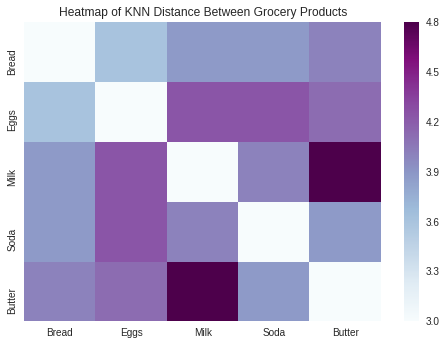

In [101]:
ax = plt.axes()
seaborn.heatmap(knnResults,ax = ax, robust = True,vmin = 3, vmax = 4.8, cmap = "BuPu")

ax.set_title('Heatmap of KNN Distance Between Grocery Products')
plt.show()

If we wanted to make recommendations based on other customers, rather than on product distances, we could modify the above algorithm as follws:

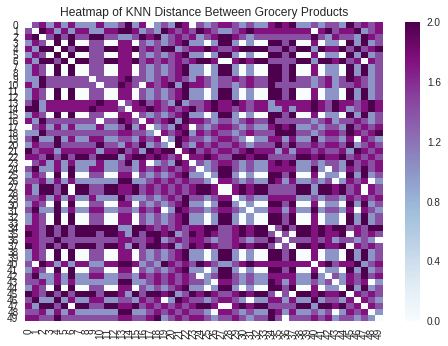

In [106]:
primaryCustomer = np.zeros(shape=(50, 50))

for customer in range(0, 50):
    for pair in range(0, 50):
      # Since there's only five products, I hard coded the index numbers here,
      # but this obviously wouldn't work if the number of products increased much
      calculateScores = (((Customer[customer][0] - Customer[pair][0]) ** 2
                           + (Customer[customer][1] - Customer[pair][1]) ** 2
                           + (Customer[customer][2] - Customer[pair][2]) ** 2
                           + (Customer[customer][3] - Customer[pair][3]) ** 2
                           + (Customer[customer][4] - Customer[pair][4]) ** 2) ** 0.5)
      primaryCustomer[customer][pair] = calculateScores

knnResultsCustomer = pd.DataFrame(primaryCustomer)

ax = plt.axes()
seaborn.heatmap(knnResultsCustomer,ax = ax, robust = True,vmin = 0, vmax = 2, cmap = "BuPu")

ax.set_title('Heatmap of KNN Distance Between Grocery Products')
plt.show()

That heatmap is obviously not quite as effective. The 'k' in KNN is important here-- we likely only want to consider t a few closest neighbors. Let's look at an example:

In [110]:
# We'll use the top 10 neigbors for customer 10

Customer10Nearest = knnResultsCustomer[10].nlargest(10)
Customer10Nearest

13    2.236068
2     2.000000
20    2.000000
22    2.000000
34    2.000000
0     1.732051
14    1.732051
17    1.732051
19    1.732051
23    1.732051
Name: 10, dtype: float64

#### Executive Summary

We could explore the above results to attempt to determine the commonalities between customer 10 and his ten nearest neighbors, but in a grocery store setting, it makes more sense to find the nearest neighbors of the products we sell, rather than the consumers buying them. After all, the relationship we are concerned with should still be preserved.

In other setting, it may make more sense to focus on distance between consumer-- products that are consumed at different times, such as movies or experiences, may not match as well when directly compared. 

KNN is a useful algorithm that can give management insight into product relationships and potentially uncover interesting avenues for revenue, so it should be in the toolbox of every data engineer. 